In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


Looks we have features named **ps_ind_xx** which are mostly hidden for security reasons. But this aint stopping a data scientist analyse the dataset. Let's layout our steps to analyse EDA

1. ** Retrive information on all the column types.**
2. **Hunt down the NaN or Null values in the dataset. **
3. **Visualizing Binary and Categorical Features seperately**
4. **Study continously varying features**

## Step 1: Retrive information on all the column types.
 

In [4]:
# Get information on names of columns
# Only taking till 5 index,
# as names might populate the code output and is not intuitive for this simple EDA
train.columns[:5]

Index([u'id', u'target', u'ps_ind_01', u'ps_ind_02_cat', u'ps_ind_03'], dtype='object')

In [5]:
# Get those dtypes of those named columns
train.dtypes[:5] 

id               int64
target           int64
ps_ind_01        int64
ps_ind_02_cat    int64
ps_ind_03        int64
dtype: object

To be honest. I honestly can't interpret the information clearly with two plain black outputs! Let's build a panda data frame of names of columns and their types.

In [6]:
df_dtypes = pd.DataFrame({'Feature': train.columns , 'Data Type': train.dtypes.values})

In [7]:
df_dtypes.head(15)

,Data Type,Feature
0,int64,id
1,int64,target
2,int64,ps_ind_01
3,int64,ps_ind_02_cat
4,int64,ps_ind_03
5,int64,ps_ind_04_cat
6,int64,ps_ind_05_cat
7,int64,ps_ind_06_bin
8,int64,ps_ind_07_bin
9,int64,ps_ind_08_bin


Looks good to me. And when I checked the full dataframe there are no **strings**, **object**, and **time-type** as they are already proccesed as given in the Description, 

> **Data Description**
> In this competition, you will predict the probability that an auto insurance policy holder files a claim.
> 
> In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

In [8]:
## Fixing -1 with NaN values
train_v1 = train.replace(-1, np.NaN)
test_v1 = test.replace(-1, np.NaN)

## Step 2 : Hunt down the NaN or Null values in the dataset

 

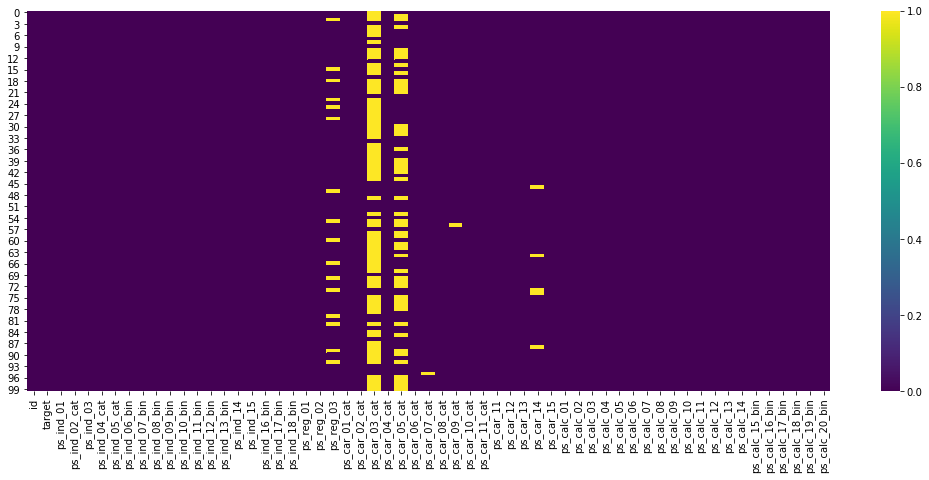

In [9]:
plt.figure(figsize=(18,7))
sns.heatmap(train_v1.head(100).isnull() == True, cmap='viridis')

**Explaning the code :**
1. **train.isnull() == True** - Returns a matrix of True and False values. **True** if a cell is Null, **False** if not null.
2. **cmap='viridis'**   -  Color scheme for the heatmap. This one is my favorite. 

The yellow bars indicate the presence of NaN values. It seems like few processed categorical have missing values.

In [10]:
have_null_df = pd.DataFrame(train_v1.isnull().any(), columns=['Have Null?']).reset_index()

In [11]:
have_null_df[have_null_df['Have Null?'] == True]['index']

3     ps_ind_02_cat
5     ps_ind_04_cat
6     ps_ind_05_cat
22        ps_reg_03
23    ps_car_01_cat
24    ps_car_02_cat
25    ps_car_03_cat
27    ps_car_05_cat
29    ps_car_07_cat
31    ps_car_09_cat
34        ps_car_11
35        ps_car_12
37        ps_car_14
Name: index, dtype: object

Looks like we are having the complete list of columns to be **busted**. Filling these Null values can have a greater significance in your score.  

**Dropping all the NaN values for initial EDA**

In [12]:
train_v1.dropna(inplace=True)

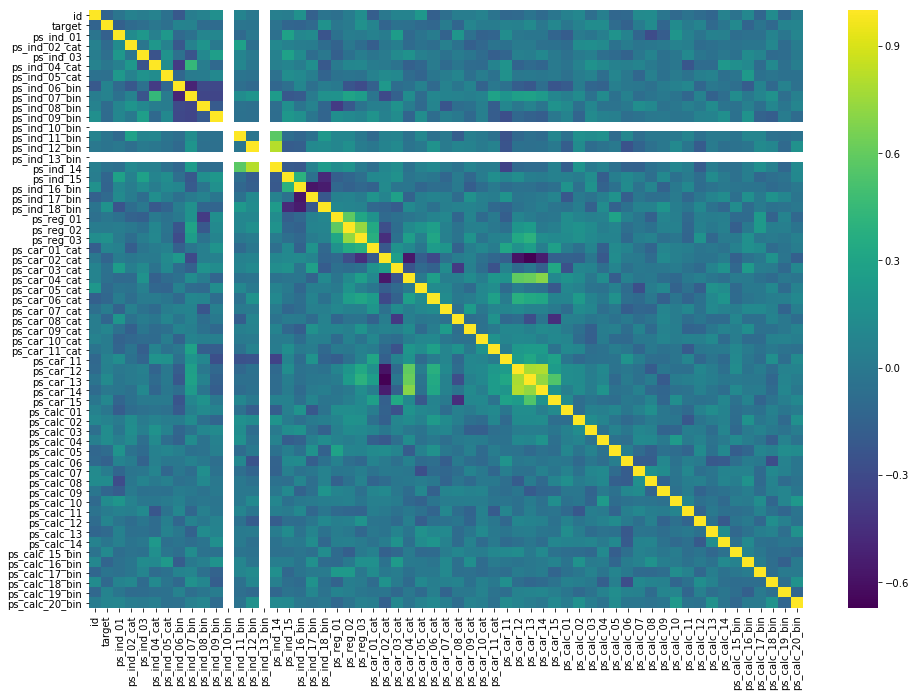

In [13]:
plt.figure(figsize=(16,11))
sns.heatmap(train_v1.head(100).corr(), cmap='viridis')

**We are having these empty white spaces because the heatmap is plotted with correlation between the binary, interger and categorical feature. This form of representation is hard to interpret. Let's divide our columns into seperate groups to carry our further analysis.
**

## Step 3: Visualizing Binary and Categorical Features seperately

In [14]:
binary_feat = [c for c in train_v1.columns if c.endswith("bin")]
categorical_feat = [c for c in train_v1.columns if c.endswith("cat")]

### Binary features  countplots

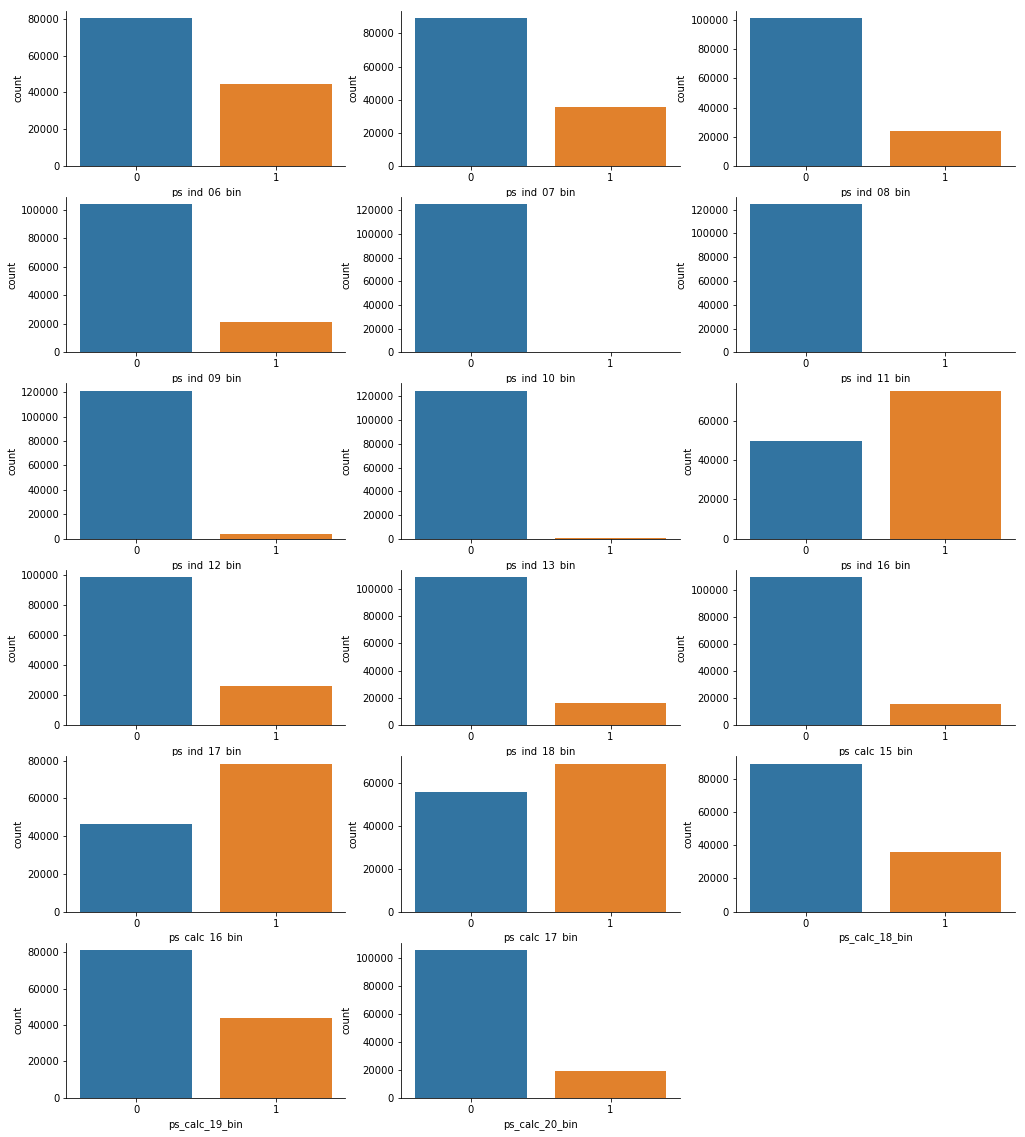

In [15]:
plt.figure(figsize=(17,20))
for i, c in enumerate(binary_feat):
    ax = plt.subplot(6,3,i+1)
    sns.countplot(train_v1[c])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

### Categorical Countplots

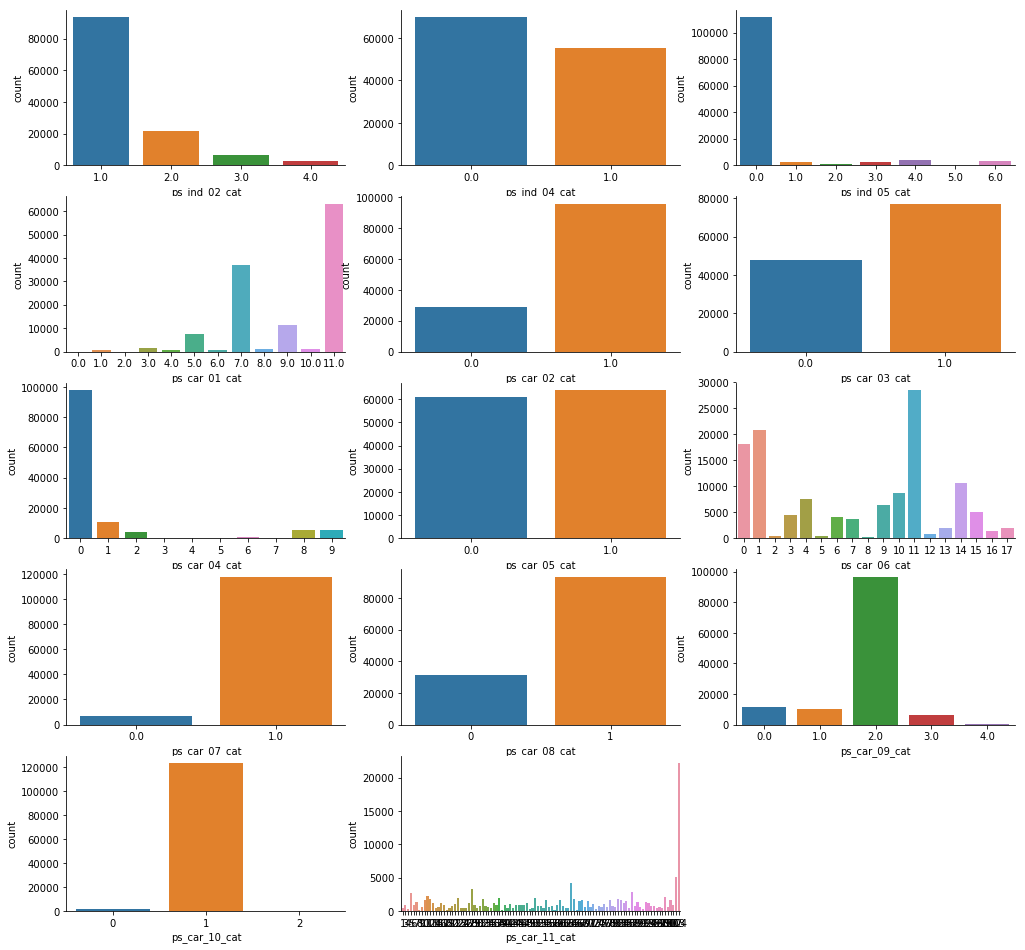

In [16]:
plt.figure(figsize=(17,20))
for i, c in enumerate(categorical_feat):
    ax = plt.subplot(6,3,i+1)
    sns.countplot(train_v1[c])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

The count plot of ps_car_11_cat seems to have lot of categories. Let's check out the zoomed version of the graph

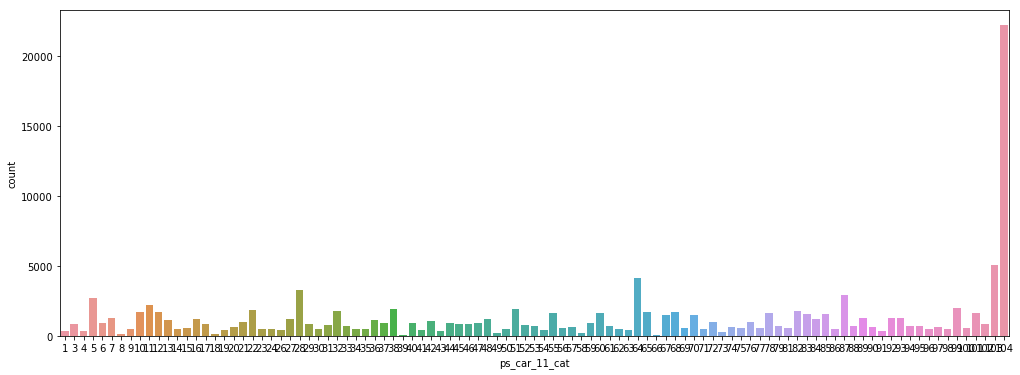

In [17]:
plt.figure(figsize=(17,6))
sns.countplot(train_v1['ps_car_11_cat'])

We can see spike in the right end of the plot. Let's check the number of unique valies in **ps_car_11_cat**

In [18]:
print ("There are {} unique values for ps_car_11_cat" .format(train_v1['ps_car_11_cat'].nunique()))

There are 101 unique values for ps_car_11_cat


Now, that are too many number categories. Let's see the top 10 highest counted categories...

In [19]:
train_v1['ps_car_11_cat'].value_counts().head(10)

104    22202
103     5065
64      4137
28      3254
87      2891
5       2726
11      2212
99      2024
51      1929
38      1902
Name: ps_car_11_cat, dtype: int64

## Step 4: Study continously varying features

In [20]:
continuous_feat= [i for i in train_v1.columns if 
                    ((i not in binary_feat) and (i not in categorical_feat) and (i not in ["target", "id"]))]

In [21]:
train_v1[continuous_feat].head(5)

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,...,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
3,0,2,0,8,0.9,0.2,0.580948,1.0,0.374166,0.542949,...,4,7,1,8,4,2,2,2,4,9
7,5,4,0,13,0.7,0.4,0.607248,3.0,0.446990,0.900574,...,2,7,1,6,1,13,7,1,3,6
9,1,2,0,4,0.9,1.4,2.316652,2.0,0.447214,1.458184,...,2,8,2,9,1,11,3,5,0,6
13,1,3,0,12,0.7,0.9,0.684197,3.0,0.400000,0.983311,...,1,10,1,8,3,8,2,0,4,3
17,5,6,0,4,0.9,0.5,0.810864,2.0,0.316228,0.876295,...,3,8,2,9,1,10,9,1,3,9


In [22]:
ind_feat = [c for c in continuous_feat if c.startswith("ps_ind")]
reg_feat = [c for c in continuous_feat if c.startswith("ps_reg")]
car_feat = [c for c in continuous_feat if c.startswith("ps_car")]
calc_feat = [c for c in continuous_feat if c.startswith("ps_calc")]
target = ['target']

Time to check the correlation with our **target value**.

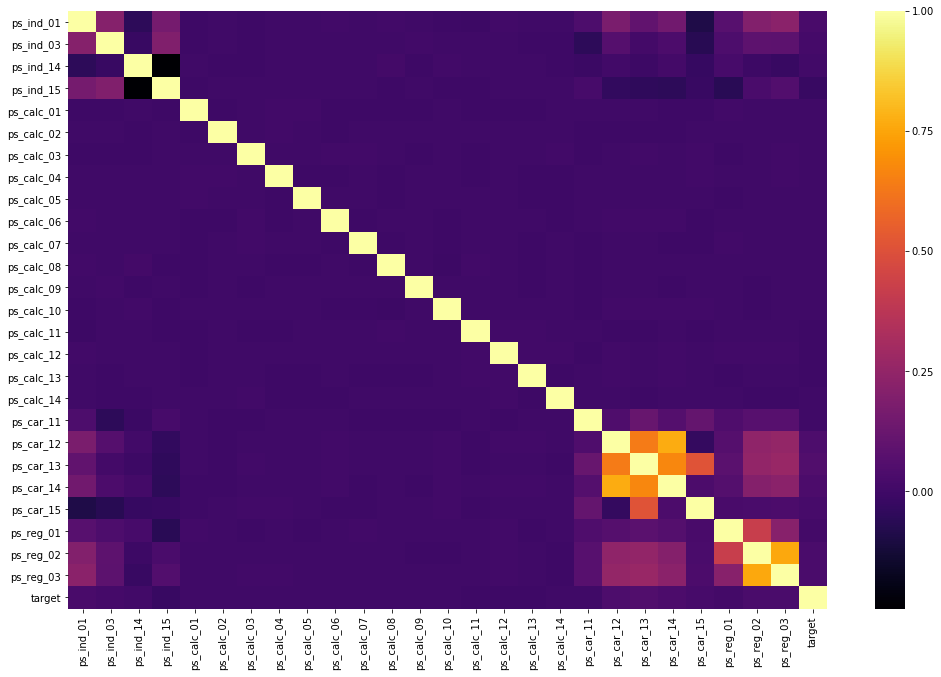

In [23]:
plt.figure(figsize=(17,11))
sns.heatmap(train_v1[ind_feat+ calc_feat + car_feat + reg_feat + target].corr(), cmap= plt.cm.inferno)

Hmm.. Something clicked at top left and bottom right portion. Let's remove calc_feat and observe the heatmap

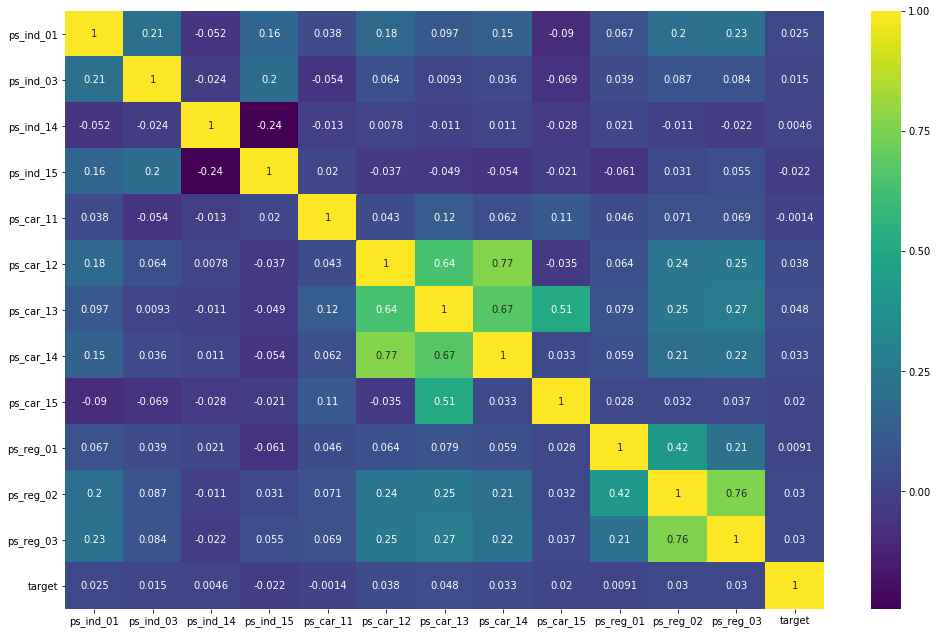

In [24]:
plt.figure(figsize=(17,11))
sns.heatmap(train_v1[ind_feat+ car_feat + reg_feat + target].corr(), cmap= 'viridis', annot=True)

**That's all for today. This notebook shall be updated biweekly with new information and dept EDA.**

**Next update - 3 Oct, 2017**

**#TODO** list for this notebook
1. Detailed EDA
2. Feature Importance through various models and their ensemble importance.
3. Explaining how to choose the best ML model / ensemble methods.
4. Parameters tuning and Hyper parameters setting.

Feel free to brainstrom ideas and other queries in the comment section.

***P.S - This is my first Kaggle EDA Kernel. Upvotes are extremly appreciated! ***